<center>
<img src="../../img/ods_stickers.jpg">


[Материал разработат на основе электронного ресурса](Ю.Кашницкого.https://mlcourse.ai/book/index.html)

# <center> Обучение без учителя
## <center>Часть 1. Метод главных компонент

Существует несколько эквивалентных математических формулировок метода главных компонент. Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. 

Другая формулировка PCA – для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных. Хотя формально задачи сингулярного разложения матрицы данных и спектрального разложения ковариационной матрицы совпадают, алгоритмы вычисления сингулярного разложения напрямую, без вычисления ковариационной матрицы и её спектра, более эффективны и устойчивы.

Ещё одной из формулировок задачи PCA является нахождение такой $d$-мерной плоскости в признаковом пространстве, что ошибка проецирования обучающих объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $d$ главными компонентами.

### Интуиция метода

Рассмотрим двухмерный пример, где вместо двух признаков можно завести их линейную комбинацию.

Для "хорошего"направления сумма расстояний до выбранной прямой (гиперплоскости) минимальна. Слева показано "хорошее" направление, справа – "плохое".

<img src='../../img/pca_good_bad_direction.png'>

Пусть прямая задается единичным вектором $u$. Минимизация расстояния от точки $x^{(i)}$ до прямой эквивалентна минимизации угла между радиус-вектором $x^{(i)}$ и вектором $u$. Косинус такого угла можно выразить так:

$$ \Large cos~\theta = \frac{x^{{(i)}^T} u }{||x^{(i)}||}, ||u|| = 1$$

Задача состоит в том, чтобы найти такое направление $u$, что сумма квадратов проекций минимальна (то есть сумма квадратов косинусов максимальна). 

$$\Large u = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(x^{{(i)}^T} u )^2} = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(u^Tx^{{(i)}} )(x^{{(i)}^T} u )} =$$ $$ \Large  \arg\max_{||u||=1} u^T \left[\frac{1}{m} \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} \right] u $$

Удобно ввести ковариационную матрицу $$\Large \Sigma = \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} = X^TX \in \mathbb{R}^{n \times n}$$

Тогда решается оптимизационная задача:

$$\Large \max_{u}{u^T \Sigma u},~~~u^Tu = 1$$

Лагранжиан для этой задачи: $$\Large L(u, \lambda) = u^T \Sigma u - \lambda (u^Tu-1)$$

Его производная по $u$: $$\Large \nabla_u L = \Sigma u - \lambda u = 0 \Leftrightarrow \Sigma u =\lambda u$$

То есть $u$ должен быть собственным вектором ковариационной матрицы $\Sigma$.

Обобщение: если хотим ввести $k$-размерное пространства вместо $n$- размерного, берем $k$ собственных векторов ковариационной матрицы $\Sigma$, соответсвующих $k$ максимальным собственным значениям. Тогда новым образом каждой точки $x^{(i)} \in \mathbb{R}^n$ обучающей выборки будет 
$$\Large z^{(i)} = \left[
\begin{array}{c}
u_1^Tx^{(i)} \\ 
u_2^Tx^{(i)} \\ 
\ldots \\ 
u_k^Tx^{(i)} 
\end{array}
\right] \in \mathbb{R}^k$$

Один из наиболее эффективных способов нахождения собственных векторов матрицы $\Sigma$ - использование сингулярного разложения исходной матрицы $X$:

$$\Large X = UDV^T,$$

где $U \in R^{m \times m}$,  $V \in R^{n \times n}$, а $D \in R^{m \times n}$ - диагональная матрица вида

<img src='../../img/svd_diag_matrix.png' width=70%>

### Сингулярное разложение

Рассмотрим более подробно задачу о сингулярном разложении матрицы $X \in \mathbb{R}^{m \times n}$. 
*Сингулярным разложением* матрицы $X$ называется представление её в виде $X = UD V^T$, где:

 - $D$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
 - $U$ и $V$ – ортогональные матрицы порядка $m$  и $n$ соответственно.
 
Элементы главной диагонали матрицы $D$ называются *сингулярными числами* матрицы $X$, а столбцы $U$ и $V$ левыми и правыми *сингулярными векторами* матрицы $X$.

Заметим, что матрицы $XX^T$ и $X^TX$ являются симметрическими неотрицательно определенными матрицами, и поэтому ортогональным преобразованием могут быть приведены к диагональному виду, причем на диагонали будут стоять неотрицательные собственные значения этих матриц.

В силу указанных выше свойств матриц $X^TX$ и $XX^T$ сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении этих матриц. Более точно:
- Левые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $XX^T$.
- Правые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $X^TX$.
- Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

Таким образом, для нахождения сингулярного разложения матрицы $X$ необходимо, найти собственные векторы и значения матриц $X^TX$ и $XX^T$ и составить из них матрицы $U, V, D$.

### Алгоритм PCA
1. Определить $k<n$ – новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

### Двухмерный пример

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

Доля дисперсии, объясняемая каждым компонентом:
1st component - 0.86,
2nd component - 0.14

Направления основных компонентов:
1st component: [-0.38120878  0.92448897] 
2nd component: [0.92448897 0.38120878]


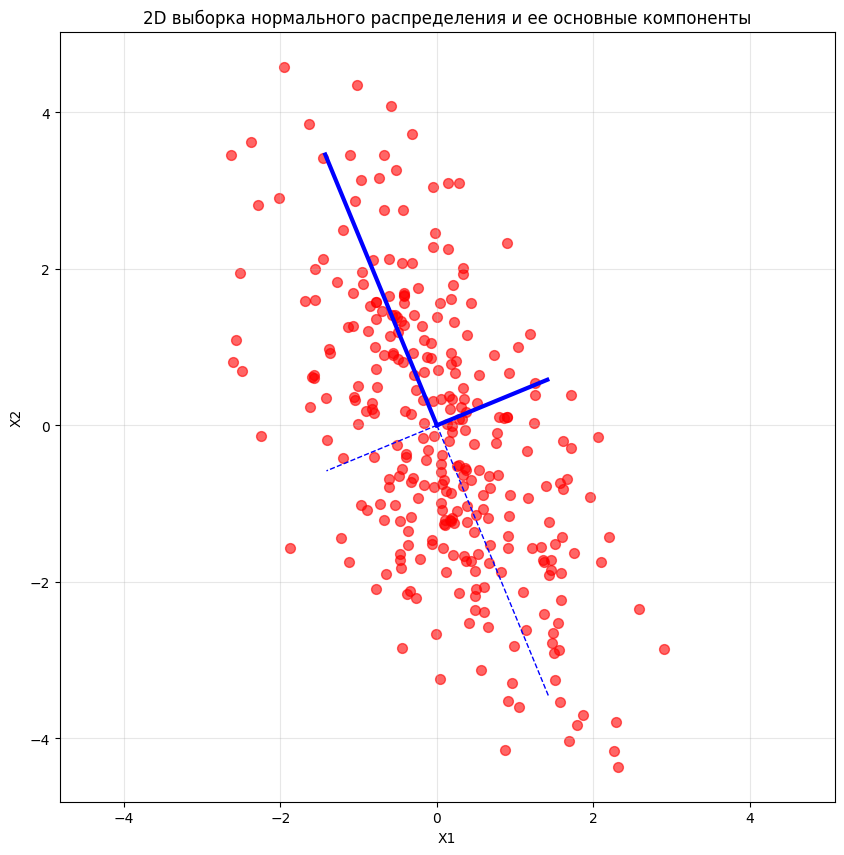

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)
mean = np.array([0.0, 0.0])
# Исправленная симметричная ковариационная матрица
cov = np.array([[1.0, -1.0], 
                [-1.0, 3.0]])  # Изменено -2.0 на -1.0 для симметрии

X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)

print('Доля дисперсии, объясняемая каждым компонентом:\n' +\
      '1st component - {:.2f},\n2nd component - {:.2f}\n'
      .format(pca.explained_variance_ratio_[0], 
              pca.explained_variance_ratio_[1]))

print('Направления основных компонентов:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r', alpha=0.6)

# Визуализация главных компонент
for l, v in zip(pca.explained_variance_, pca.components_):
    d = 2 * np.sqrt(l) * v  # Изменен масштаб для лучшей визуализации
    plt.plot([0, d[0]], [0, d[1]], '-b', lw=3)
    plt.plot([0, -d[0]], [0, -d[1]], '--b', lw=1)  # Добавлено противоположное направление

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D выборка нормального распределения и ее основные компоненты')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

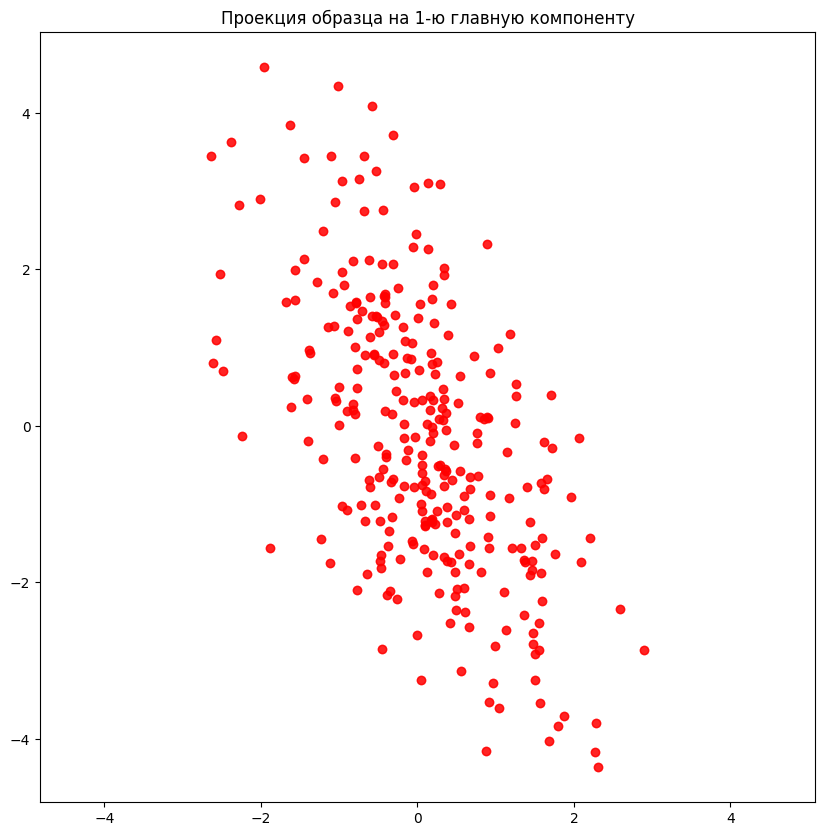

In [4]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Проекция образца на 1-ю главную компоненту')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:
- На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
- На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
- На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности). 

#### Пример с набором данных Iris

Значение двух компонентов:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


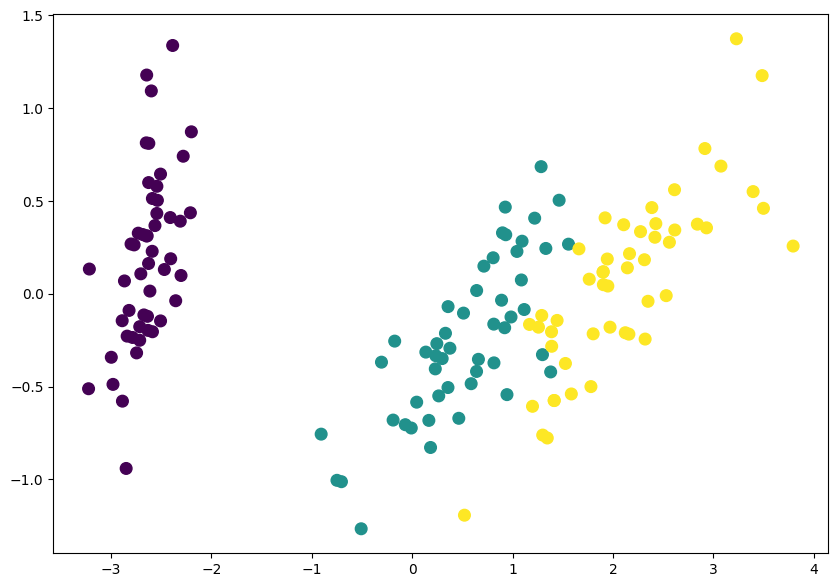

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Значение двух компонентов:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

### Пример с набором данных digits

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

Projecting 64-dimensional data to 2D


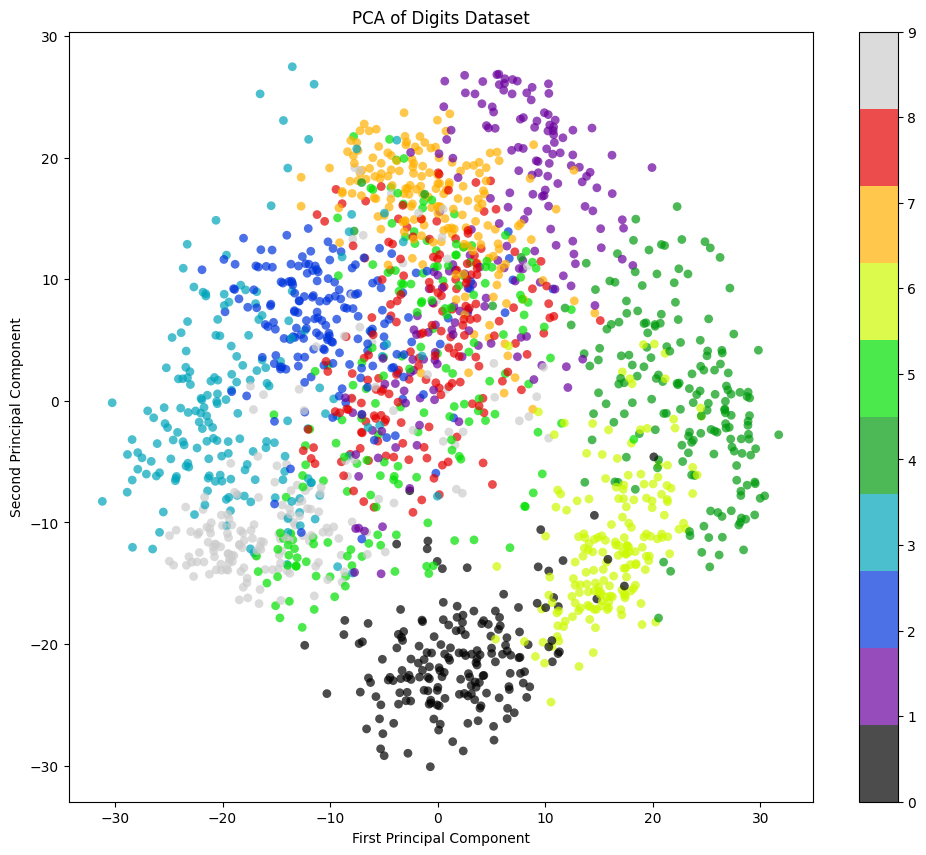

Explained variance ratio: [0.14890594 0.13618771]
Total variance explained: 0.285


In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

# Create plot (fixed to avoid deprecation warning)
plt.figure(figsize=(12,10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=mpl.colormaps['nipy_spectral'].resampled(10))
plt.colorbar(scatter)
plt.title('PCA of Digits Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Optional: Print explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

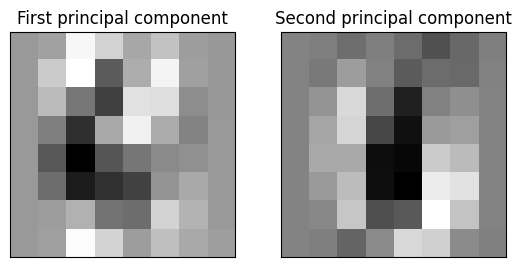

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Сжатие данных

Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

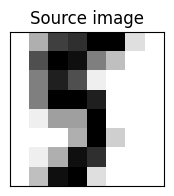

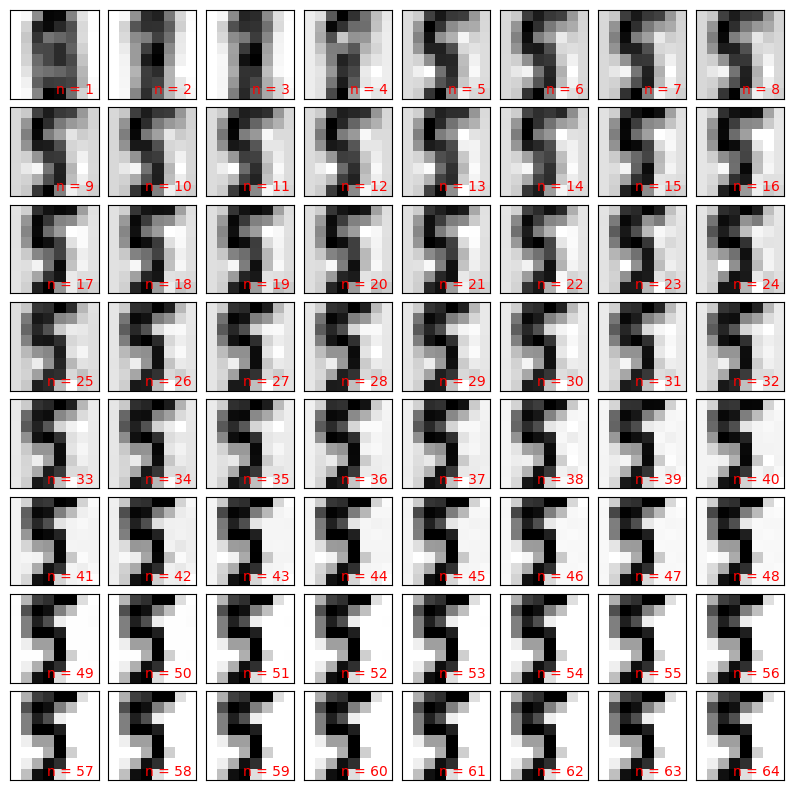

In [9]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

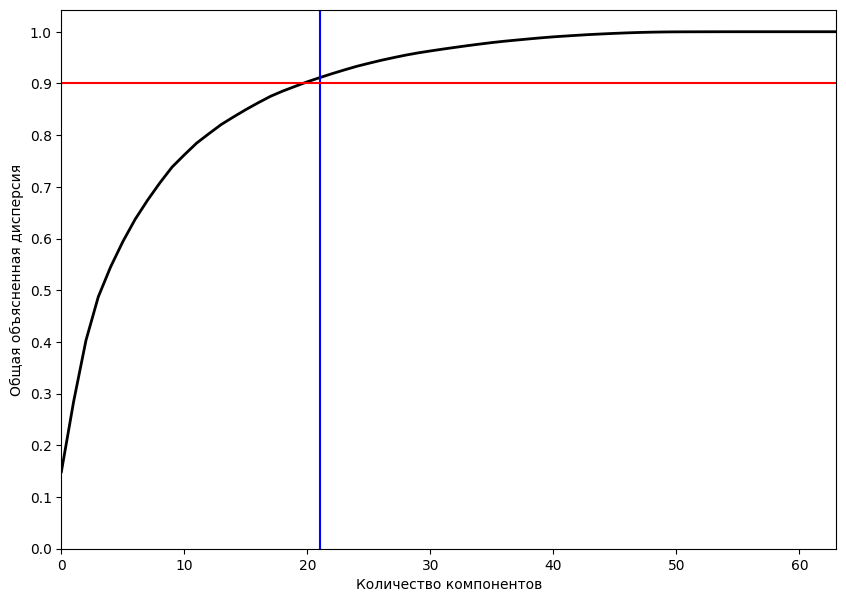

In [10]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Количество компонентов')
plt.ylabel('Общая объясненная дисперсия')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [11]:
pca = PCA(0.9).fit(X)
print('Нам нужно %d компонентов, чтобы объяснить 90%% дисперсии.' 
      % pca.n_components_)

Нам нужно 21 компонентов, чтобы объяснить 90% дисперсии.


### Предобработка данных

Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц. 

Для начала посмотрим на исходные данные.

In [13]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)
    

c:\Python314\Lib\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976009
  warnings.warn(f"Retry downloading from url: {remote.url}")


1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: total: 55 s
Wall time: 2min 34s


Распределение целевого класса:

In [14]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


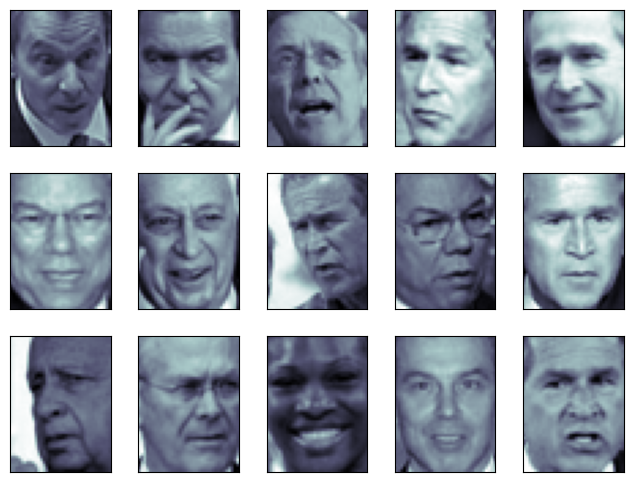

In [15]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [16]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

100 главных компонентов объясняют 91.49% дисперсии


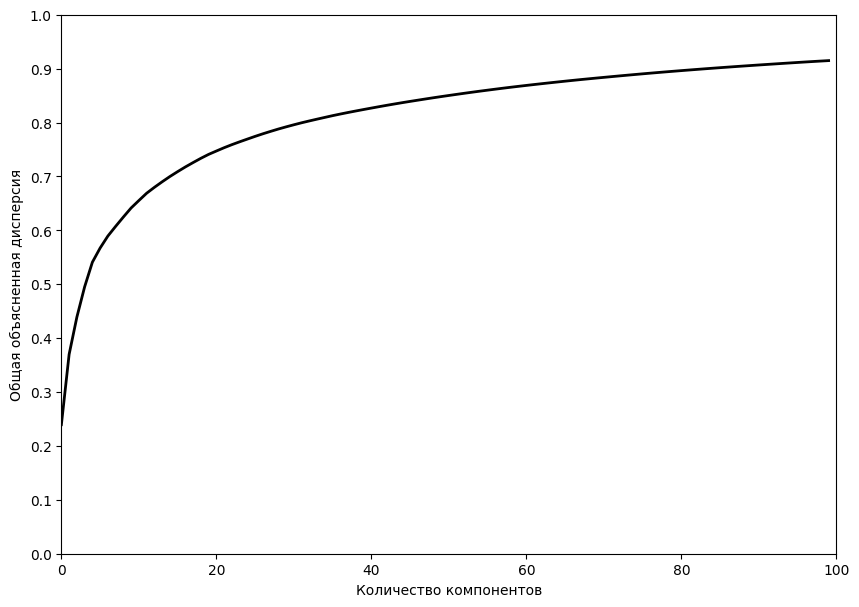

In [17]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 главных компонентов объясняют %.2f%% дисперсии' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Количество компонентов')
plt.ylabel('Общая объясненная дисперсия')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

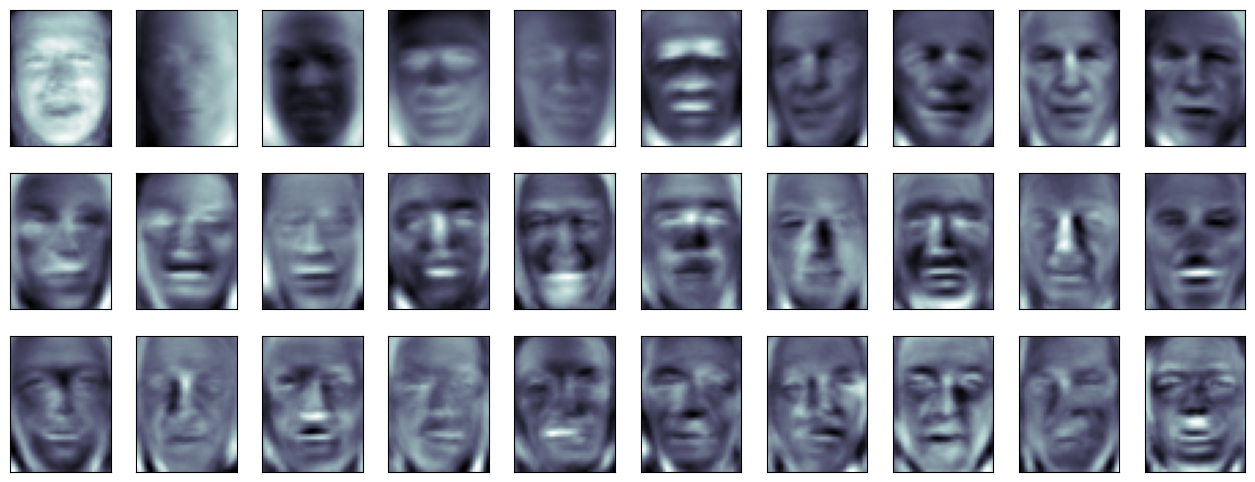

In [18]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA позволяет посмотреть на "среднее" лицо – тут считается среднее по каждому новому признаку.

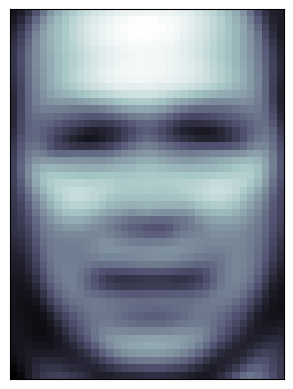

In [19]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить  работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [20]:
%%time
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

CPU times: total: 203 ms
Wall time: 208 ms


Accuracy: 0.769231
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.67      0.65        15
     Colin Powell       0.85      0.77      0.81        65
  Donald Rumsfeld       0.57      0.55      0.56        29
    George W Bush       0.83      0.92      0.88       133
Gerhard Schroeder       0.69      0.67      0.68        33
      Hugo Chavez       0.64      0.56      0.60        16
   Jacques Chirac       0.80      0.33      0.47        12
    Jean Chretien       0.75      0.60      0.67        10
    John Ashcroft       0.79      0.61      0.69        18
Junichiro Koizumi       0.61      1.00      0.76        11
  Serena Williams       1.00      0.79      0.88        19
       Tony Blair       0.70      0.79      0.74        29

         accuracy                           0.77       390
        macro avg       0.74      0.69      0.70       390
     weighted avg       0.77      0.77      0.76       390



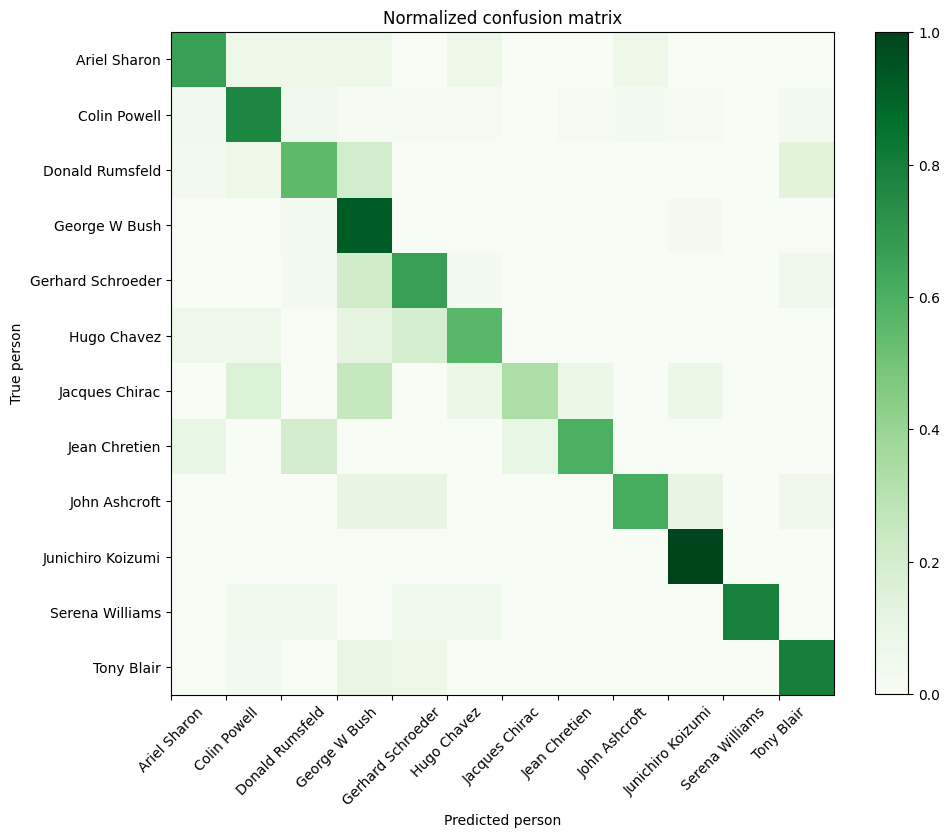

In [21]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

## Полезные ссылки
- [Формальное описание PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

## Задание:

Даны синтетические наборы данных:
200 наблюдениями и 16 переменными: https://statisticsglobe.com/wp-content/uploads/2023/09/data_pca_200x16.csv
1000 наблюдениями и 51 переменной: https://statisticsglobe.com/wp-content/uploads/2023/09/data_pca_1000x51.csv
10 000 наблюдений и 201 переменной: https://statisticsglobe.com/wp-content/uploads/2023/09/data_pca_10000x201.csv
1. Загрузить CSV и импортировать данные.
2. Применить PCA к нашим данным.
3. Определить оптимальное количество компонентов.
4. Извлечь эти компоненты и сохранить их в новом фрейме данных.
5. Применить любой метод машинного обучения, которым пользовались ранее.

    

Loading datasets...

Loading data_pca_200x16.csv
✓ Successfully loaded: (200, 16)
Columns: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'y']
First 5 rows:
      x1    x2    x3    x4     x5    x6    x7    x8    x9   x10   x11   x12  \
0  -4.44  0.99  2.92  3.24  10.02  2.65 -2.10 -1.76 -3.24  6.95 -1.08 -2.11   
1  13.92  1.51  2.93  3.81  -3.15  2.20 -5.39  1.84 -2.70 -0.39  0.02  5.01   
2   4.57  0.48 -0.62  4.52   1.41  1.35  4.95  1.51  4.12 -1.10  0.46 -0.85   
3   6.58  1.48 -0.90  1.74   0.79  1.98  4.10  0.93  0.71 -2.11 -1.80  5.43   
4   1.78  2.84  3.61  0.05  -0.33  2.49  0.72  1.28  2.06  3.86  0.57  3.33   

    x13    x14   x15     y  
0 -4.92 -13.50 -3.09 -0.47  
1 -2.22  -0.55 -0.98  0.99  
2  2.38  -5.09  0.70  1.36  
3  2.15  -0.24  0.57  1.43  
4 -1.26   0.64 -6.14  1.03  

Loading data_pca_1000x51.csv
✓ Successfully loaded: (1000, 51)
Columns: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x

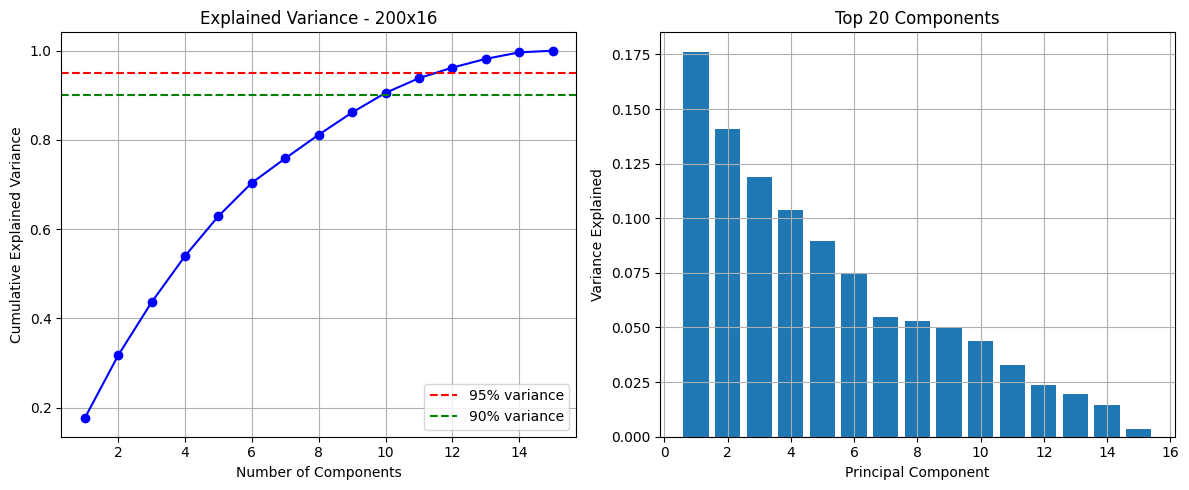


200x16: 12 components explain 95% of variance
Reduced from 15 to 12 dimensions
Total variance explained: 0.962
✓ Saved optimized components to pca_200x16_optimized.csv

200x16 Model Comparison:

--- Random Forest Regressor ---
Original features (15 dims):
  R² Score: 0.640
  MSE: 0.106
PCA features (12 dims):
  R² Score: 0.551
  MSE: 0.132
R² Change: -0.089

--- Linear Regression ---
Original features R²: 0.942
PCA features R²: 0.718
R² Change: -0.224

Processing 1000x51 dataset
DataFrame shape: (1000, 51)

Features shape: (1000, 50)
Target shape: (1000,)
Target statistics:
  Min: -2.73
  Max: 7.61
  Mean: 2.04
  Std: 1.52
✓ Standardization successful
✓ PCA successful


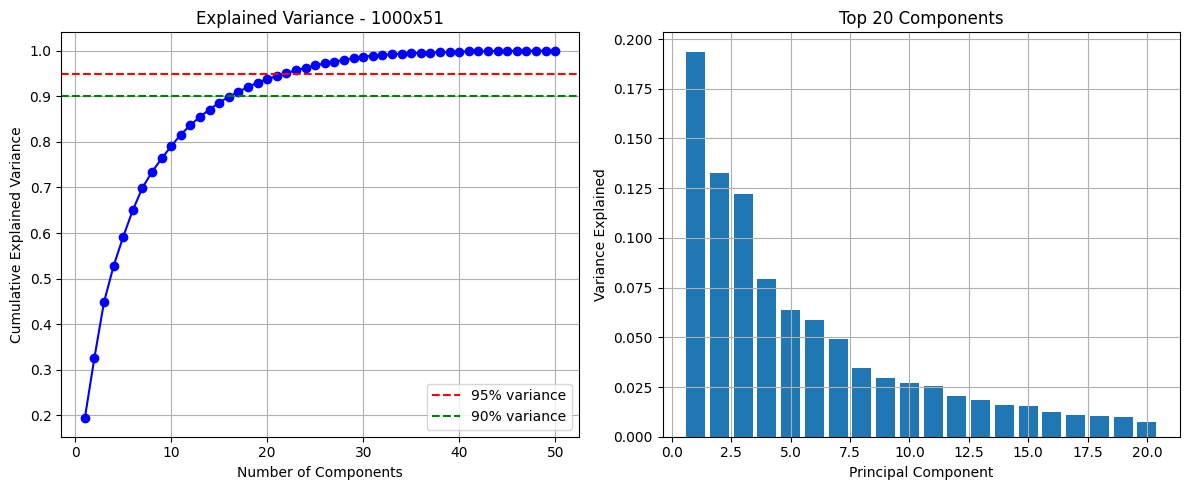


1000x51: 22 components explain 95% of variance
Reduced from 50 to 22 dimensions
Total variance explained: 0.951
✓ Saved optimized components to pca_1000x51_optimized.csv

1000x51 Model Comparison:

--- Random Forest Regressor ---
Original features (50 dims):
  R² Score: 0.574
  MSE: 1.173
PCA features (22 dims):
  R² Score: 0.570
  MSE: 1.183
R² Change: -0.004

--- Linear Regression ---
Original features R²: 0.975
PCA features R²: 0.835
R² Change: -0.140

Processing 10000x201 dataset
DataFrame shape: (10000, 201)

Features shape: (10000, 200)
Target shape: (10000,)
Target statistics:
  Min: -176.72
  Max: 213.65
  Mean: 30.29
  Std: 47.20
✓ Standardization successful
✓ PCA successful


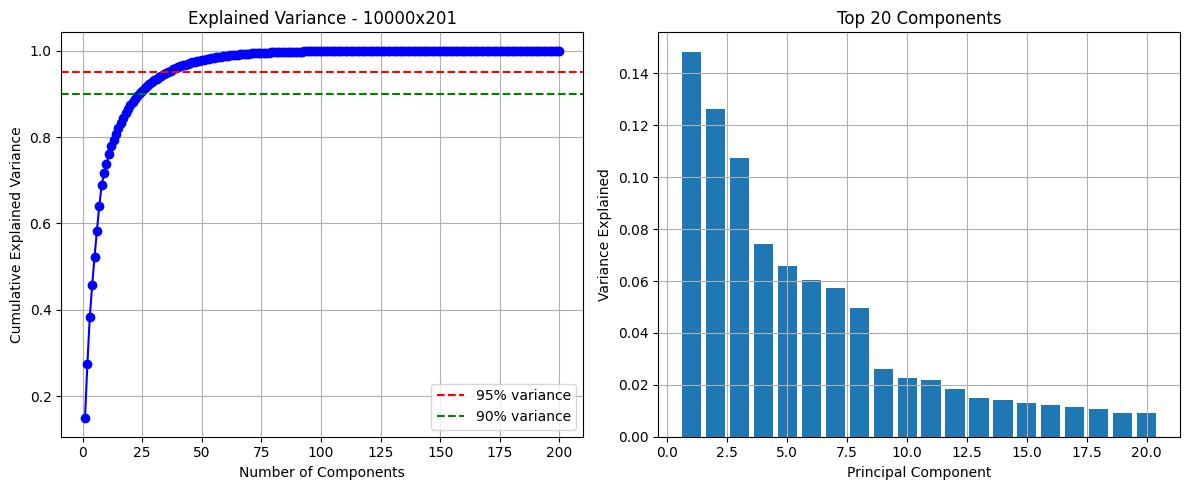


10000x201: 36 components explain 95% of variance
Reduced from 200 to 36 dimensions
Total variance explained: 0.951
✓ Saved optimized components to pca_10000x201_optimized.csv

10000x201 Model Comparison:

--- Random Forest Regressor ---
Original features (200 dims):
  R² Score: 0.913
  MSE: 193.233
PCA features (36 dims):
  R² Score: 0.860
  MSE: 311.236
R² Change: -0.053

--- Linear Regression ---
Original features R²: 1.000
PCA features R²: 0.987
R² Change: -0.013

✅ Analysis complete!


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Changed to Regressor
from sklearn.linear_model import LinearRegression  # Alternative regression model
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to load European-style CSV (semicolon delimiter, comma decimal)
def load_european_csv(filepath):
    """
    Load CSV files with European format:
    - Semicolon (;) as delimiter
    - Comma (,) as decimal separator
    """
    print(f"\n{'='*50}")
    print(f"Loading {filepath}")
    print('='*50)
    
    try:
        df = pd.read_csv(
            filepath, 
            sep=';',           # Semicolon delimiter
            decimal=',',        # Comma as decimal separator
            quotechar='"',      # Quote character
            encoding='utf-8'
        )
        
        print(f"✓ Successfully loaded: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"First 5 rows:")
        print(df.head())
        
        return df
        
    except Exception as e:
        print(f"✗ Error loading file: {e}")
        return None

# Load all datasets
print("Loading datasets...")
df_200 = load_european_csv('data_pca_200x16.csv')
df_1000 = load_european_csv('data_pca_1000x51.csv')
df_10000 = load_european_csv('data_pca_10000x201.csv')

# Function to analyze dataset with PCA and regression
def analyze_dataset(df, name):
    if df is None:
        print(f"\n❌ Skipping {name} - failed to load")
        return
    
    print(f"\n{'='*50}")
    print(f"Processing {name} dataset")
    print(f"DataFrame shape: {df.shape}")
    
    # Separate features and target (last column is 'y')
    if 'y' in df.columns:
        X = df.drop('y', axis=1)
        y = df['y']
        
        print(f"\nFeatures shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        print(f"Target statistics:")
        print(f"  Min: {y.min():.2f}")
        print(f"  Max: {y.max():.2f}")
        print(f"  Mean: {y.mean():.2f}")
        print(f"  Std: {y.std():.2f}")
        
        # PCA Analysis
        try:
            # Standardize features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            print(f"✓ Standardization successful")
            
            # Apply PCA
            pca = PCA()
            X_pca = pca.fit_transform(X_scaled)
            print(f"✓ PCA successful")
            
            # Plot explained variance
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            cumsum = np.cumsum(pca.explained_variance_ratio_)
            plt.plot(range(1, len(cumsum)+1), cumsum, 'bo-')
            plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
            plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
            plt.xlabel('Number of Components')
            plt.ylabel('Cumulative Explained Variance')
            plt.title(f'Explained Variance - {name}')
            plt.legend()
            plt.grid(True)
            
            # Individual variance explained
            plt.subplot(1, 2, 2)
            plt.bar(range(1, min(21, len(pca.explained_variance_ratio_)+1)), 
                    pca.explained_variance_ratio_[:20])
            plt.xlabel('Principal Component')
            plt.ylabel('Variance Explained')
            plt.title('Top 20 Components')
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
            
            # Find optimal components for 95% variance
            n_components_95 = np.argmax(cumsum >= 0.95) + 1
            print(f"\n{name}: {n_components_95} components explain 95% of variance")
            
            # Extract optimal components
            pca_opt = PCA(n_components=0.95)
            X_pca_opt = pca_opt.fit_transform(X_scaled)
            
            print(f"Reduced from {X.shape[1]} to {X_pca_opt.shape[1]} dimensions")
            print(f"Total variance explained: {sum(pca_opt.explained_variance_ratio_):.3f}")
            
            # Create DataFrame with components
            component_names = [f'PC{i+1}' for i in range(X_pca_opt.shape[1])]
            X_pca_df = pd.DataFrame(X_pca_opt, columns=component_names)
            X_pca_df['target'] = y.values
            
            # Save to CSV
            output_file = f'pca_{name}_optimized.csv'
            X_pca_df.to_csv(output_file, index=False)
            print(f"✓ Saved optimized components to {output_file}")
            
            # Train regression models for comparison
            print(f"\n{name} Model Comparison:")
            
            # Split original features
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            
            # Split PCA features
            X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(
                X_pca_opt, y, test_size=0.2, random_state=42
            )
            
            # 1. Random Forest Regressor
            print("\n--- Random Forest Regressor ---")
            rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
            
            # Original features
            rf_reg.fit(X_train, y_train)
            y_pred_orig = rf_reg.predict(X_test)
            r2_orig = r2_score(y_test, y_pred_orig)
            mse_orig = mean_squared_error(y_test, y_pred_orig)
            
            # PCA features
            rf_reg.fit(X_pca_train, y_train_pca)
            y_pred_pca = rf_reg.predict(X_pca_test)
            r2_pca = r2_score(y_test_pca, y_pred_pca)
            mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
            
            print(f"Original features ({X.shape[1]} dims):")
            print(f"  R² Score: {r2_orig:.3f}")
            print(f"  MSE: {mse_orig:.3f}")
            print(f"PCA features ({X_pca_opt.shape[1]} dims):")
            print(f"  R² Score: {r2_pca:.3f}")
            print(f"  MSE: {mse_pca:.3f}")
            print(f"R² Change: {r2_pca - r2_orig:+.3f}")
            
            # 2. Linear Regression (for comparison)
            print("\n--- Linear Regression ---")
            lr = LinearRegression()
            
            # Original features
            lr.fit(X_train, y_train)
            y_pred_orig = lr.predict(X_test)
            r2_orig = r2_score(y_test, y_pred_orig)
            
            # PCA features
            lr.fit(X_pca_train, y_train_pca)
            y_pred_pca = lr.predict(X_pca_test)
            r2_pca = r2_score(y_test_pca, y_pred_pca)
            
            print(f"Original features R²: {r2_orig:.3f}")
            print(f"PCA features R²: {r2_pca:.3f}")
            print(f"R² Change: {r2_pca - r2_orig:+.3f}")
            
        except Exception as e:
            print(f"❌ Error in analysis: {e}")
    else:
        print(f"❌ No 'y' column found in {name}")

# Process each dataset
datasets = [
    ('200x16', df_200),
    ('1000x51', df_1000),
    ('10000x201', df_10000)
]

for name, df in datasets:
    analyze_dataset(df, name)

print("\n✅ Analysis complete!")